<img src="topo.png" width="100%"/><br /> <i>Última análise: 30/08/2022</i>

<div id="indice" class="alert alert-block alert-success">

<h1>Índice</h1>
<ol>
    <li><a href="#0">Objetivo</a></li>
    <li><a href="#1">Sobre a varíola dos macacos</a></li>
    <li><a href="#2">Verificação de dados</a></li>
    <li><a href="#3">Curiosidades (EDA)</a></li>
    <li><a href="#4">Previsões com Prophet</a></li>
        <ol>
        <li><a href="#41">Previsão de novos casos diários - 90 Dias</a></li>
        <li><a href="#42">Previsão de novos casos diários acumulados</a></li>
    </ol>
    <li><a href="#5">Conclusões</a></li>
    </ol>
</div>

<div id="0"><h1>1 - Objetivo</h1>

O objetivo desse estudo é conhecer mais sobre a varíola dos macacos, como está a situação atual no mundo, quantidade de hospitalizações e principalmente previsões no crescimento dos casos no Brasil, extraindo informações que podem ser úteis para a população em geral.

Foi utilizado o dataset público do Kaggle, atualizado diariamente neste <a href="https://www.kaggle.com/datasets/deepcontractor/monkeypox-dataset-daily-updated/download?datasetVersionNumber=101" target="_blank">link</a>.

<div id="1"><h1>2 - Sobre a varíola dos macacos</h1>

<p>A varíola dos macacos é transmitida pelo vírus monkeypox, que pertence ao gênero orthopoxvirus. É considerada uma zoonose viral (o vírus é transmitido aos seres humanos a partir de animais) com sintomas muito semelhantes aos observados em pacientes com varíola, embora seja clinicamente menos grave. O período de incubação da varíola dos macacos é geralmente de seis a 13 dias, mas pode variar de cinco a 21 dias, segundo a Organização Mundial da Saúde (OMS).</p>

<p>O nome monkeypox se origina da descoberta inicial do vírus em macacos em um laboratório dinamarquês em 1958. O primeiro caso humano foi identificado em uma criança na República Democrática do Congo em 1970. Atualmente, segundo a OMS esclareceu, a maioria dos animais suscetíveis a este tipo de varíola são roedores, como ratos e cão-da-pradaria.</p>

<p>A transmissão ocorre por contato próximo com lesões, fluidos corporais, gotículas respiratórias e materiais contaminados, como roupas de cama. E, segundo o órgão de saúde, a transmissão de humano para humano está ocorrendo entre pessoas com contato físico próximo com casos sintomáticos.</p>

<p>O contato próximo com pessoas infectadas ou materiais contaminados deve ser evitado. Luvas e outras roupas e equipamentos de proteção individual devem ser usados ao cuidar dos doentes, seja em uma unidade de saúde ou em casa.</p>

<h2>Sintomas:</h2>

<p>A OMS descreve quadros diferentes de sintomas para casos suspeitos, prováveis e confirmados. Passa a ser considerado um caso suspeito qualquer pessoa, de qualquer idade, que apresente pústulas (bolhas) na pele de forma aguda e inexplicável e esteja em um país onde a varíola dos macacos não é endêmica. Se este quadro for acompanhado por dor de cabeça, início de febre acima de 38,5°C, linfonodos inchados, dores musculares e no corpo, dor nas costas e fraqueza profunda, é necessário fazer exame para confirmar ou descartar a doença.</p>

<p>Casos considerados “prováveis” incluem sintomas semelhantes aos dos casos suspeitos, como contato físico pele a pele ou com lesões na pele, contato sexual ou com materiais contaminados 21 dias antes do início dos sintomas. Soma-se a isso, histórico de viagens para um país endêmico ou ter tido contato próximo com possíveis infectados no mesmo período e/ou ter resultado positivo para um teste sorológico de orthopoxvirus na ausência de vacinação contra varíola ou outra exposição conhecida ao vírus.</p>

<p>Casos confirmados ocorrem quando há confirmação laboratorial para o vírus da varíola dos macacos por meio do exame PCR (Reação em Cadeia da Polimerase) em tempo real e/ou sequenciamento.</p>

<p>A prevenção e o controle dependem da conscientização das comunidades e da educação dos profissionais de saúde para prevenir a infecção e interromper a transmissão.</p>

 

<p><b>Fontes:</b></p>

<ul>
    <li><a href="https://bvsms.saude.gov.br/02-6-variola-dos-macacos/" target="_blank">Biblioteca Virtual em Saúde</a></li>
    <li><a href="https://butantan.gov.br/noticias/variola-dos-macacos-sintomas-transmissao-origem-e-numero-de-casos-sao-atualizados-pela-oms" target="_blank">Instituto Butantan</a></li>
    <li><a href="https://brasil.un.org/pt-br/183321-surto-de-variola-dos-macacos-ainda-pode-ser-controlado-garante-oms" target="_blank">Organização das Nações Unidas (ONU) – Escritório Brasil</a></li>
    <li><a href="https://news.un.org/pt/story/2022/05/1790052" target="_blank">ONU News</a<</li>
</ul>
</div>

<a href="#indice"><img src="botao-topo.png" width="15%"/></div>

<h4>Importação de bibliotecas necessárias</h4>

In [727]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings
warnings.filterwarnings("ignore")

<h4>Importação de CVs para o Pandas</h4>

In [728]:
timeline_casos = pd.read_csv("Worldwide_Case_Detection_Timeline.csv", index_col="Date_confirmation")
casos_mundo = pd.read_csv("Monkey_Pox_Cases_Worldwide.csv",index_col="Country")
casos_diarios_mundo = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv",index_col="Country")

In [729]:
pd.set_option('display.max_rows', 30)

In [762]:
def espaco():
    print('--' * 40)

<a href="#indice"><img src="botao-topo.png" width="15%"/></div>

<div id="2"><h2>3 - Verificações de dados</h2></div>

<h4>Quantidade de linhas e colunas em cada dataset</h4>

In [763]:
print(timeline_casos.shape)
print(casos_mundo.shape)
print(casos_diarios_mundo.shape)

(104, 1)
(120, 6)
(103, 117)


<h4>Verificação de tipos de cada coluna</h4>

In [764]:
espaco()
print('Informações timeline de casos: ')
print(timeline_casos.info())
espaco()
print('Informações de casos diários no mundo: ')
print(casos_diarios_mundo.info())
espaco()
print('Informações de casos no mundo: ')
print(casos_mundo.info())
espaco()

--------------------------------------------------------------------------------
Informações timeline de casos: 
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 2022-01-31 to 2022-08-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  104 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB
None
--------------------------------------------------------------------------------
Informações de casos diários no mundo: 
<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, Nigeria to Paraguay
Columns: 117 entries, 2022-01-31 to 2022-08-29
dtypes: int64(117)
memory usage: 100.0+ KB
None
--------------------------------------------------------------------------------
Informações de casos no mundo: 
<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, England to Sierra Leone
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----

<b style="color:#1e6d06">Observação:</b> As colunas estão no formato que precisam, apenas as datas dos casos diários que estão como int e vamos converter para datetime mais pra frente.

<h4>Verificação de dados nulos</h4>

In [765]:
espaco()
print(timeline_casos.isnull().sum())
espaco()
print(casos_diarios_mundo.isnull().sum())
espaco()
print(casos_mundo.isnull().sum())
espaco()

--------------------------------------------------------------------------------
Country    0
dtype: int64
--------------------------------------------------------------------------------
2022-01-31    0
2022-02-17    0
2022-02-28    0
2022-03-04    0
2022-03-31    0
             ..
2022-08-25    0
2022-08-26    0
2022-08-27    0
2022-08-28    0
2022-08-29    0
Length: 117, dtype: int64
--------------------------------------------------------------------------------
Confirmed_Cases        0
Suspected_Cases        0
Hospitalized           0
Travel_History_Yes     0
Travel_History_No      0
Hospercent            13
dtype: int64
--------------------------------------------------------------------------------


In [766]:
espaco()
print(timeline_casos.isnull().sum())
espaco()
print(casos_diarios_mundo.isnull().sum())
espaco()
print(casos_mundo.isnull().sum())
espaco()

--------------------------------------------------------------------------------
Country    0
dtype: int64
--------------------------------------------------------------------------------
2022-01-31    0
2022-02-17    0
2022-02-28    0
2022-03-04    0
2022-03-31    0
             ..
2022-08-25    0
2022-08-26    0
2022-08-27    0
2022-08-28    0
2022-08-29    0
Length: 117, dtype: int64
--------------------------------------------------------------------------------
Confirmed_Cases        0
Suspected_Cases        0
Hospitalized           0
Travel_History_Yes     0
Travel_History_No      0
Hospercent            13
dtype: int64
--------------------------------------------------------------------------------


<h4>Detalhes de cada dataset</h4>

In [767]:
espaco()
print(timeline_casos.describe(include = 'all'))
espaco()
print(casos_diarios_mundo.describe(include = 'all'))
espaco()
print(casos_mundo.describe(include = 'all'))
espaco()

--------------------------------------------------------------------------------
                     Country
count                    104
unique                   104
top     United Arab Emirates
freq                       1
--------------------------------------------------------------------------------
       2022-01-31  2022-02-17  2022-02-28  2022-03-04  2022-03-31  2022-04-10  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     0.029126    0.029126    0.009709    0.019417    0.058252    0.038835   
std      0.295599    0.295599    0.098533    0.197066    0.591198    0.394132   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      3.000000    3.000000    1.000000    

<a href="#indice"><img src="botao-topo.png" width="15%"/></div>

<div id="3"><h2>4 - Curiosidades (EDA)</h2></div>

<h4>Top 20 países com mais casos confirmados</h4>

In [736]:
casos_mundo.sort_values(by="Confirmed_Cases",ascending=False )[["Confirmed_Cases"]][:20]

,Confirmed_Cases
Country,
United States,17995.0
Spain,6459.0
Brazil,4693.0
Germany,3422.0
France,3417.0
England,3191.0
Peru,1434.0
Canada,1228.0
Netherlands,1136.0


<b style="color:#1e6d06">Observação:</b> Infelizmente o Brasil já figura na terceira posição, com 4693 casos confirmados.

<h4>Top 20 países com mais hospitalizações</h4>

In [737]:
casos_mundo.sort_values(by="Hospitalized",ascending=False )[["Confirmed_Cases","Hospitalized"]][:20]

,Confirmed_Cases,Hospitalized
Country,,
Italy,740.0,18.0
Germany,3422.0,18.0
Spain,6459.0,13.0
Singapore,16.0,8.0
Romania,36.0,7.0
England,3191.0,5.0
Bolivia,69.0,5.0
United States,17995.0,4.0
Dominican Republic,9.0,4.0


<b style="color:#1e6d06">Observação:</b> Temos 3 hospitalizações, é interessante descobrirmos o percentual relativo à quantidade de casos.

<h4>Criação de coluna com percentual de hospitalizações</h4>

In [738]:
casos_mundo['Hospercent'] = (casos_mundo['Hospitalized'] / casos_mundo['Confirmed_Cases']) * 100

In [739]:
casos_mundo.sort_values(by="Hospercent",ascending=False )[["Confirmed_Cases","Hospitalized","Hospercent"]][:20]

,Confirmed_Cases,Hospitalized,Hospercent
Country,,,
Nepal,0.0,1.0,inf
Somalia,0.0,3.0,inf
Pakistan,0.0,1.0,inf
Kosovo,0.0,1.0,inf
Cuba,1.0,1.0,100.000000
Japan,4.0,4.0,100.000000
Guyana,2.0,2.0,100.000000
South Korea,1.0,1.0,100.000000
Cyprus,4.0,3.0,75.000000


<b style="color:#1e6d06">Observação:</b> Seja pela origem dos dados ou governos não fornecendo as informações necessárias, diversos países estão com percentuais de casos estranhas.

In [740]:
casos_mundo.sort_values(by="Hospitalized",ascending=False )[["Confirmed_Cases","Hospitalized","Hospercent"]][13:14]

,Confirmed_Cases,Hospitalized,Hospercent
Country,,,
Brazil,4693.0,3.0,0.063925


<b style="color:#1e6d06">Observação:</b> 0,639% Dos casos confirmados brasileiros estão hospitalizados.

<h4>15 Tipos de sintomas mais comuns</h4>

In [741]:
timeline_casos['Symptoms'].value_counts()[:15]

genital ulcer lesions               30
oral and genital ulcers, fever      17
ulcerative lesions                  16
Rash                                13
genital ulcers                       5
skin lesions, ulcerative lesions     5
vesicular rash                       5
rash                                 3
skin lesions                         3
rash on the skin                     2
Rash, fever                          2
Skin lesions                         2
fever, skin lesions                  2
fever, rash                          2
Fatigue, headache, fever             2
Name: Symptoms, dtype: int64

<h4>Contaminados por gênero</h4>

In [742]:
timeline_casos['Gender'].replace(to_replace = ['female',' female', 'female '], value = "Female", inplace=True)
timeline_casos['Gender'].replace(to_replace = ['male','  male', 'male '], value = "Male", inplace=True)
timeline_casos['Gender'].value_counts()

Male      2182
Female      14
Name: Gender, dtype: int64

<b style="color:#1e6d06">Observação:</b> Apenas 14 mulheres foram identificadas como contaminadas

<h3>Contaminados por idade</h4>

In [743]:
timeline_casos['Age'].value_counts()

20-69    585
15-64    271
15-74    240
20-64    225
20-59    203
        ... 
0-14       1
19-59      1
65-69      1
60-64      1
41-45      1
Name: Age, Length: 82, dtype: int64

<b style="color:#1e6d06">Observação:</b> Os dados estão fracos, eventualmente no futuro eu faço o tratamento deles.

<h4>Pessoas contaminadas por idade no Brasil</h4>

In [744]:
timeline_casos.where(timeline_casos['Country'] == 'Brazil').groupby(['Country', 'City'])['City'].count().sort_values(ascending=False)

Country  City               
Brazil   Belo Horizonte         6
         Sete Lagoas            2
         Rio de Janeiro City    2
         Curitiba               2
         Vinhedo                1
         Sao Paulo              1
         Russas                 1
         Porto Alegre           1
         Natal                  1
         Marica                 1
         Indaiatuba             1
         Fortaleza              1
         Cascavel               1
Name: City, dtype: int64

<h4>Primeiro caso no Brasil</h4>

In [745]:
timeline_casos = pd.DataFrame(timeline_casos[["Country"]].drop_duplicates())

In [746]:
pdata = timeline_casos[timeline_casos["Country"] == "Brazil"].index[0]
print(pdata)

2022-06-08


<b style="color:#1e6d06">Observação:</b> O primeiro caso no Brasil foi dia 08 de Junho de 2022.

<h4>Percentual de Brasileiros contaminados com histórico de viagens</h4>

In [747]:
x = (casos_mundo["Travel_History_Yes"] / casos_mundo["Confirmed_Cases"]).loc["Brazil"]*100
print(round(x,2),'%')

0.43 %


<b style="color:#1e6d06">Observação:</b> Apenas 0,43% dos casos confirmados no Brasil são de pessoas com histórico de viagens, o que significa que a transmissão local já se propaga muito mais comparado a quem viaja.

<h4>Criação do Dataframe apenas com os dados do Brasil</h4>

In [748]:
daily_cases_BR = casos_diarios_mundo.loc["Brazil"]
daily_cases_BR = pd.DataFrame(daily_cases_BR[daily_cases_BR!=0])

<h4>Gráfico de barras com histórico de novos casos diários no Brasil</h4>

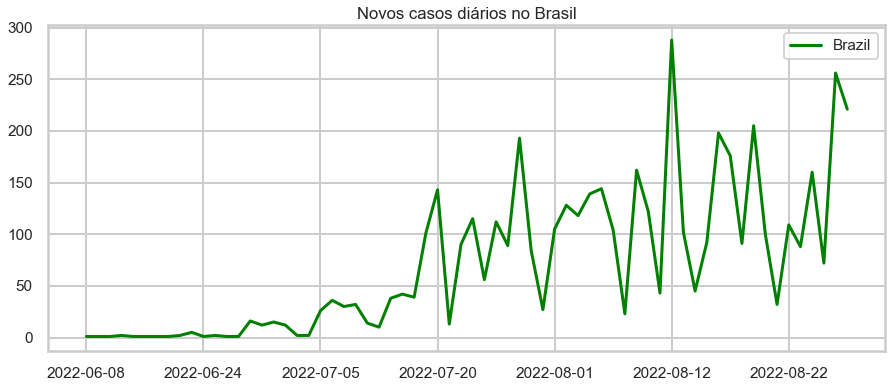

In [749]:
daily_cases_BR.plot(figsize=(15,6), color = "green", kind='line');
plt.title("Novos casos diários no Brasil");

<a href="#indice"><img src="botao-topo.png" width="15%"/></div>

<div id="4"><h2>5 - Previsões com Prophet</h2>
Algoritmo criado pelo time de Data Science do Facebook, lida muito bem com séries temporais e sazonalidades.
</div>

<h4>Criação do Dataframe de acordo com as obrigações do Prophet (Colunas renomeadas para ds e y)</h4>
<a href="https://facebook.github.io/prophet/docs/quick_start.html" target="_blank">Fonte</a>

In [750]:
data = {'ds':pd.to_datetime(daily_cases_BR.index), 'y':daily_cases_BR["Brazil"].values}
df = pd.DataFrame(data)
df.head()

,ds,y
0,2022-06-08,1
1,2022-06-11,1
2,2022-06-12,1
3,2022-06-14,2
4,2022-06-16,1


<h4>Instanciação do Prophet e fitting</h4>

In [751]:
m = Prophet()
m.fit(df)

16:42:16 - cmdstanpy - INFO - Chain [1] start processing
16:42:16 - cmdstanpy - INFO - Chain [1] done processing


<div id="41"><h3>Previsão de novos casos diários - 90 Dias</h3></div>

In [752]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

In [753]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-08,-14.564336,-66.534000,33.249098
1,2022-06-11,-31.082386,-78.722649,21.020320
2,2022-06-12,-61.121734,-109.660965,-6.984427
3,2022-06-14,-8.470497,-60.380219,45.060527
4,2022-06-16,-23.909943,-74.839479,26.769629


<b style="color:#1e6d06">Observação:</b> Gerou corretamente do início

In [754]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2022-11-23,357.592021,307.343932,407.708398
152,2022-11-24,332.742350,285.217828,382.457869
153,2022-11-25,399.969693,350.679798,450.181786
154,2022-11-26,341.075028,290.115318,392.012191
155,2022-11-27,311.036032,260.997816,359.307063


<b style="color:#1e6d06">Observação:</b> E também até o final dos 90 dias

<h4>Gráfico de previsão</h4>

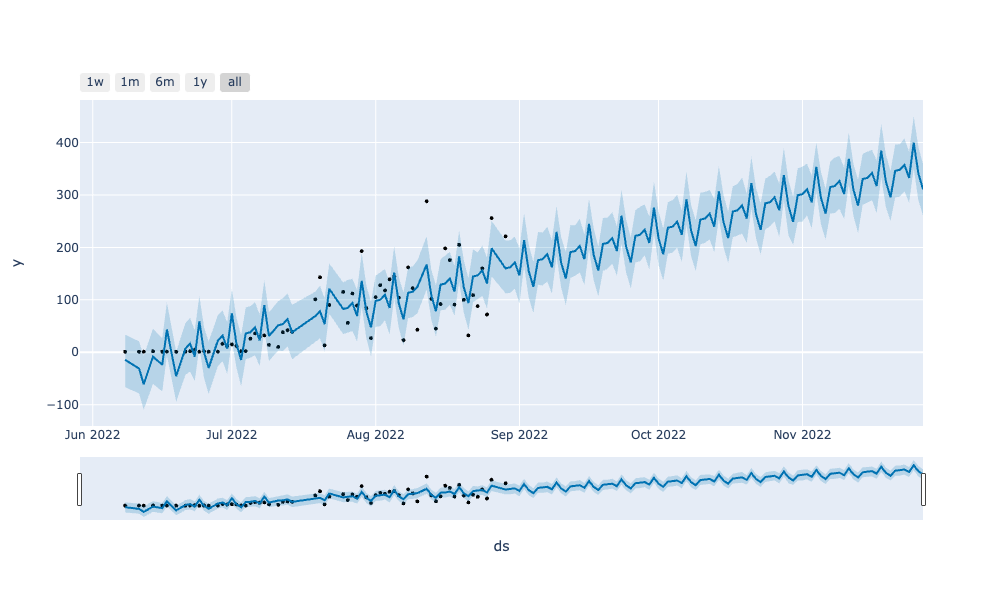

In [755]:
plot_plotly(m, forecast)

<h4>Utilização do Components para ver tendências mensais e de dias da semana</h4>

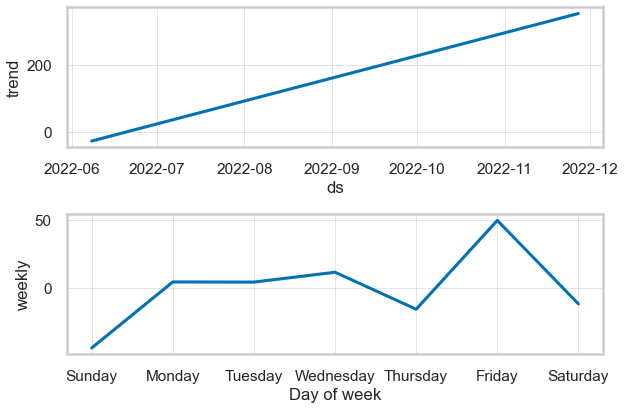

In [756]:
fig2 = m.plot_components(forecast)

<b style="color:#1e6d06">Observação:</b> A tendência é claramente de aumento nos casos, como são poucos dias desde o começo, é difícil ter precisão, porém, sabemos que a quantidade continuará aumentando.

<div id="42"><h3>Previsão de novos casos diários acumulados</h3></div>

<h4>Alteração da coluna y para somatória utilizando .cumsum()</h4>

In [757]:
df['y'] = df['y'].cumsum()
df.head()

,ds,y
0,2022-06-08,1
1,2022-06-11,2
2,2022-06-12,3
3,2022-06-14,5
4,2022-06-16,6


In [758]:
m = Prophet()
m.fit(df)

16:42:17 - cmdstanpy - INFO - Chain [1] start processing
16:42:18 - cmdstanpy - INFO - Chain [1] done processing


In [759]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

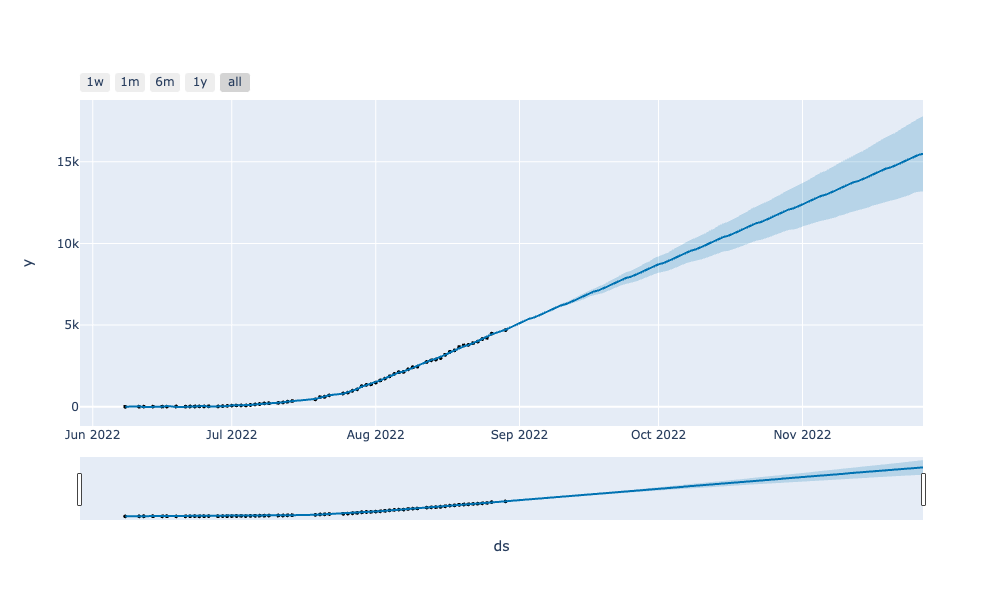

In [760]:
plot_plotly(m, forecast)

<h4>Utilização do Components para ver tendências mensais e de dias da semana</h4>

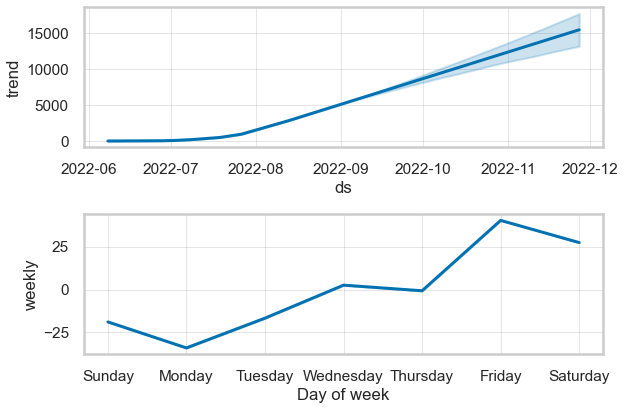

In [761]:
fig3 = m.plot_components(forecast)

<a href="#indice"><img src="botao-topo.png" width="15%"/></div>

<div id="5"><h2>6 - Conclusões</h2></div>

Embora a quantidade de casos esteja crescendo consistentemente, o número e percentual de hospitalizações é baixo em comparação com o coronavírus. Como não temos no dataset a quantidade de mortes, é difícil prever, porém, nos baseando no percentual de hospitalizações, esse percentual muito provavelmente será baixo também.

Devemos nos instruir e nos conscientizar sobre maneiras de prevenção para que não escale como o coronavírus escalou e trouxe prejuízos incalculáveis.

Para mais informação sobre a varíola dos macacos, acesse o site do <a href="https://www.gov.br/saude/pt-br/assuntos/variola-dos-macacos" target="_blank">Ministério da Sáude</a>.

<img src="ty.gif" width="100%"/>

<a href="#indice"><img src="botao-topo.png" width="15%"/></div>